# 一、 Pands 基礎入門 

## 宣告資料
+ Pandas 常用的資料類型有:
1. Series:一維陣列資料，列(index)為資料儲存順序
2. Dataframe:二維的資料陣列，由列(index)及欄(column)組合而成

#### Pandas 模組匯入

In [ ]:
import pandas as pd

#### Series 一維資料

In [3]:
# se = pd.Series(串列)
# 宣告
import pandas as pd
# 一維資料 Series
price = [100, 50, 120, 80, 30]
se = pd.Series(price)

# 求值
se.values

# 求索引
se.index

# 自訂index
fruits = ['Apple', 'Orange', 'Banana', 'Cherry', 'Tomato']
price = [100, 50, 120, 80, 30]
se2 = pd.Series(price, index = fruits)
se2

Apple     100
Orange     50
Banana    120
Cherry     80
Tomato     30
dtype: int64

In [5]:
# 取得數值資料的統計資訊
se2.describe()

count      5.000000
mean      76.000000
std       36.469165
min       30.000000
25%       50.000000
50%       80.000000
75%      100.000000
max      120.000000
dtype: float64

In [9]:
# 統計:統計:加總、最小值、最大值、平均值、中位數
se2.sum()
se2.min()
se2.max()
se2.mean()
se2.median()

80.0

In [14]:
# 取值
# se2[2] # 索引值取值

# loc 、 iloc
se2.loc['Apple']    # 索引名稱取值
se2.iloc[0]


100

#### DataFrame 二維資料

##### 範例資料
```
{
    '姓名':['林小明', '陳聰明', '黃美麗'],
    '國文':[100, 80, 90],
    '英文':[80, 100, 70],
    '數學':[65, 87, 78],
    '自然':[76, 58, 77],
}
```

In [15]:
# 定義 DataFrame 資料
# df = pd.DataFrame(字典)
import pandas as pd
df = pd.DataFrame({
    '姓名':['林小明', '陳聰明', '黃美麗'],
    '國文':[100, 80, 90],
    '英文':[80, 100, 70],
    '數學':[65, 87, 78],
    '自然':[76, 58, 77],
})

df

,姓名,國文,英文,數學,自然
0,林小明,100,80,65,76
1,陳聰明,80,100,87,58
2,黃美麗,90,70,78,77


In [31]:
# 顯示 index, column
df.index
df.columns

# 取得所有值
df.values

# 取得列資料 : 索引, loc, iloc
# df.values[1]
# df.loc[1]
# df.iloc[1]

# 取得欄資料 (單欄、 多欄)
# df['姓名']  # 單欄
df[['姓名', '國文', '數學']]    # 多欄

# 取得指定欄列(儲存格)值
# df.values[0, 1] # 索引 林小明 國文成績
# df.loc[1, '英文'] # loc 陳聰明 英文成績
# df.iloc[2, 3] # 黃美麗 數學成績

78

In [51]:
# 取得最前或最後幾筆資料
# .head(n) .tail(n) n值預設為 5
df.head(2)
df.tail(2)

# 篩選
# condition = df['姓名'] == '陳聰明'
# df[condition]
condition = (df['英文'] > 70) & (df['國文'] > 80)
df[condition]

# 排序 
# df.sort_value([欄名] [,ascendind=布林值])
df.sort_values('國文', ascending=False) # 遞減排序
df.sort_values(['國文', '英文'], ascending=[False, True])   # 多欄排序

,姓名,國文,英文,數學,自然
0,林小明,100,80,65,76
2,黃美麗,90,70,78,77
1,陳聰明,80,100,87,58


In [53]:
# 指定欄位作為索引
df1 = df.set_index('姓名')
df1

df1.loc['黃美麗', '數學']

78

#### 讀取資料
##### Pandas 可以讀取本地或是網路上「表格式」的資料,如CSV、Excel、jason、html, 方法有:
    1. read_csv()
    2. read_excel()
    3. read_jason()
    4. read_html()

In [59]:
# 讀取遠端資料
# https://od.cdc.gov.tw/eic/covid19/covid19_global_cases_and_deaths.csv
import pandas as pd
url = 'https://od.cdc.gov.tw/eic/covid19/covid19_global_cases_and_deaths.csv'
df = pd.read_csv(url, thousands=',')    # 去除千位、百萬位符號
df

condition = (df['cases'] >= 1000000)
df[condition]

,country_ch,country_en,cases,deaths
0,美國,United States,97709817,1099609
1,印度,India,44670830,530604
2,法國,France,37540763,158639
3,德國,Germany,36348477,157388
4,巴西,Brazil,35149503,689442
...,...,...,...,...
64,古巴,Cuba,1111363,8530
65,玻利維亞,Bolivia,1110505,22244
66,阿拉伯聯合大公國,UAE,1043603,2348
67,厄瓜多,Ecuador,1009958,35940


In [60]:
# 臺南市停車場即時剩餘車位資訊:https://data.gov.tw/dataset/102772/
import pandas as pd
url = 'https://parkweb.tainan.gov.tw/api/parking.php'
df = pd.read_json( url)
df

,typeId,typeName,id,code,name,zoneId,zone,address,largeCar,car,...,car_total,carDis_total,carWoman_total,carGreen_total,moto_total,motoDis_total,chargeTime,chargeFee,update_time,lnglat
0,2,公有收費停車場,1,B00001,海安路地下停車場,1,中西區,台南市中西區海安路188號B1,0,429,...,909,0,0,0,0,0,,,2022-11-26 15:36:03,"22.991501,120.195621"
1,2,公有收費停車場,6,A00051,崇善路龍山停車場,2,東區,台南市東區崇善路51號,0,104,...,158,0,0,0,0,0,,,2022-11-26 15:35:48,"22.982593,120.221534"
2,2,公有收費停車場,7,A00061,東光路地下停車場,2,東區,台南市東區東光路一段76號,0,37,...,252,0,0,0,0,0,營業時間(自行輸入),收費金額(自行輸入),2022-11-26 15:33:47,"22.992491,120.231296"
3,2,公有收費停車場,13,A00111,公園南路停車場,4,北區,台南市北區海安路3段與公園南路口,0,59,...,280,0,0,0,0,0,,,2022-11-26 15:36:57,"23.002911,120.200498"
4,2,公有收費停車場,14,A00131,榮譽街停車場,2,東區,台南市東區榮譽街,0,194,...,352,0,0,0,0,0,,,2022-11-26 15:36:02,"22.976591,120.219439"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,3,民營停車場,409,B00052,竑穗新營和平停車場,25,新營區,台南市新營區新進路二段109號,0,9,...,0,0,0,0,0,0,,,2022-11-26 15:36:02,"23.300039,120.309972"
172,3,民營停車場,410,B00053,城市車旅台南府連停車場,2,東區,臺南市東區大同路一段197巷18號旁空地,0,19,...,0,0,0,0,0,0,,,2022-11-26 15:36:02,"22.983935,120.211980"
173,3,民營停車場,411,B00054,城市車旅新市富中停車場,36,新市區,臺南市新市區富中街132號對面空地,0,65,...,0,0,0,0,0,0,,,2022-11-26 15:36:02,"23.083175,120.290616"
174,3,民營停車場,412,B00055,城市車旅中華西停車場,3,南區,台南市南區中華西路一段與建南路口空地,0,11,...,26,0,0,0,0,0,,,2022-11-26 15:36:03,"22.985008,120.186402"


In [63]:
# 停車位超過500個得停車場
condition = (df['car_total'] > 500)
# 安平區，停車位 < 100 的停車場,並排序
condition = (df['car'] < 100) & (df['zone'] == '安平區')
df[condition].sort_values('car')

,typeId,typeName,id,code,name,zoneId,zone,address,largeCar,car,...,car_total,carDis_total,carWoman_total,carGreen_total,moto_total,motoDis_total,chargeTime,chargeFee,update_time,lnglat
15,1,公有免費停車場,96,A00870,文平路與建平五街免費臨時停車場,5,安平區,安平區文平路、建平五街口,0,0,...,65,1,0,1,0,0,,,2022-11-26 15:34:52,"22.987782,120.177894"
17,1,公有免費停車場,99,A00900,本原街3段(停1),5,安平區,本原街3段、智安三街口(本淵寮公有零售市場東側),0,0,...,48,0,0,0,0,0,,,2022-11-26 15:36:17,"23.053050,120.177516"
121,2,公有收費停車場,335,A01521,水景停車場,5,安平區,安北路水景公園旁,0,0,...,137,0,0,0,0,0,營業時間(自行輸入),收費金額(自行輸入),2022-11-26 15:35:07,"22.999175,120.157886"
12,2,公有收費停車場,69,A00601,停2路外停車場 (南側),5,安平區,安平區建平16街近中華西路南側,0,1,...,66,2,2,4,0,0,,,2022-11-26 15:34:39,"22.996565, 120.185636"
13,1,公有免費停車場,93,A00840,怡平停九免費臨時停車場,5,安平區,安平區怡平路、永華6街口,0,3,...,36,1,0,0,0,0,,,2022-11-26 15:34:53,"22.993102,120.176987"
122,2,公有收費停車場,336,A01531,港濱停車場(第一區),5,安平區,台南市安平區平豐安億路口,0,3,...,22,0,0,0,0,0,營業時間(自行輸入),收費金額(自行輸入),2022-11-26 15:35:50,"22.994969,120.163416"
90,5,智慧停車,294,D00026,郡平路(路邊停車格),5,安平區,華平路口-育平路口兩側,0,9,...,29,0,0,0,0,0,08:00~22:00,每小時20元,2022-11-26 15:35:15,"22.989001,120.168962"
155,2,公有收費停車場,387,A01781,運河路(第一區)停車場,5,安平區,台南市安平區運河路9號對面,0,12,...,149,0,0,0,0,0,,,2022-11-26 15:36:02,"22.998841,120.162579"
164,3,民營停車場,402,B00045,竑穗華平二站停車場,5,安平區,台南市安平區華平路535號旁停車場,0,12,...,23,0,0,0,0,0,,,2022-11-26 15:36:02,"22.994070,120.175474"
55,4,路邊委外,254,C00049,府前四街,5,安平區,府前路口-建平17街口兩側,0,12,...,28,0,0,0,0,0,,,2022-11-26 00:00:16,"22.996996,120.185319"


In [64]:
# 讀取網頁
# 台灣高鐵票價產品一覽表
# https://www.thsrc.com.tw/ArticleContent/caa6fac8-b875-4ad6-b1e6-96c2902d12a6
import pandas as pd
url = 'https://www.thsrc.com.tw/ArticleContent/caa6fac8-b875-4ad6-b1e6-96c2902d12a6'
df = pd.read_html(url)

df

[       票種    票種.1 票價優惠                                                 說明  \
 0  普通票/全票  普通票/全票   --                  除本公司內部規章或法令另有規定外，十二歲以上之旅客應購買之乘車票。   
 1     優待票     敬老票   5折  年滿六十五歲以上（以乘車當日為準），持有國民身分證或政府核發附有照片、身分證字號及出生年、月...   
 2     優待票     愛心票   5折  持有身心障礙證明（粉紅色）之國民。（身心障礙證明背面之「必要陪伴者優惠措施」欄位須註記有「國...   
 3     優待票     兒童票   5折        未滿十二歲之兒童得購買兒童票，然身高超過150 公分之未滿十二歲兒童應 出示身分證明。   
 4     優待票    免票兒童   --  身高未滿115 公分之兒童，或身高超過115 公分但經出示證明確認未滿六歲之兒童，不佔位者得...   
 5     自由座     自由座  NaN            乘車當日不指定車次及座位，限搭乘自由座車廂。  效期限開票當日有效，逾期作廢。   
 6     團體票     團體票  95折  人數在十一人（含）以上，其起訖站、搭乘車次及車廂種類相同，且全部行程由團體成員一起旅行者，得...   
 
    詳細資訊  
 0  詳細資訊  
 1  詳細資訊  
 2  詳細資訊  
 3  詳細資訊  
 4  詳細資訊  
 5  詳細資訊  
 6  詳細資訊  ,
        票種        票種.1        票價優惠  \
 0     回數票         回數票     82折~92折   
 1     定期票         定期票         49折   
 2    早鳥優惠        早鳥優惠        65折起   
 3   信用卡優惠  標準車廂  購票折扣         7折起   
 4   信用卡優惠  商務車廂  限量升等          --   
 5    高鐵假期        高鐵假期          --   
 6    飯店聯票        飯

#### 儲存檔案
    1. to_csv(檔名, encoding="UTF-8")
    2. to_excel(檔名, encoding="UTF-8")
    3. to_jason(檔名, encoding="UTF-8")
    4. to_html(檔名, encoding="UTF-8")

In [67]:
# 臺南市停車場即時剩餘車位資訊:https://data.gov.tw/dataset/102772/
import pandas as pd
url = 'https://parkweb.tainan.gov.tw/api/parking.php'
df = pd.read_json( url)
# 儲存成CSV檔
df.to_csv('tncars.csv', encoding='UTF-8')

#### 繪製圖表
- df.plot(kind=圖表總類, x=x軸資料來源, y=y軸資料來源, title=圖表標題, grid=是否顯示格線, fontsize=字體大小, figsize=(長, 寬))

<AxesSubplot:title={'center':'股票每日成交資訊:台積電(2330)'}, xlabel='日期'>

C:\Users\Egg\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from current font.
  func(*args, **kwargs)
C:\Users\Egg\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 31080 (\N{CJK UNIFIED IDEOGRAPH-7968}) missing from current font.
  func(*args, **kwargs)
C:\Users\Egg\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  func(*args, **kwargs)
C:\Users\Egg\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  func(*args, **kwargs)
C:\Users\Egg\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  func(*args, **kwargs)
C:\Users\Egg\AppData

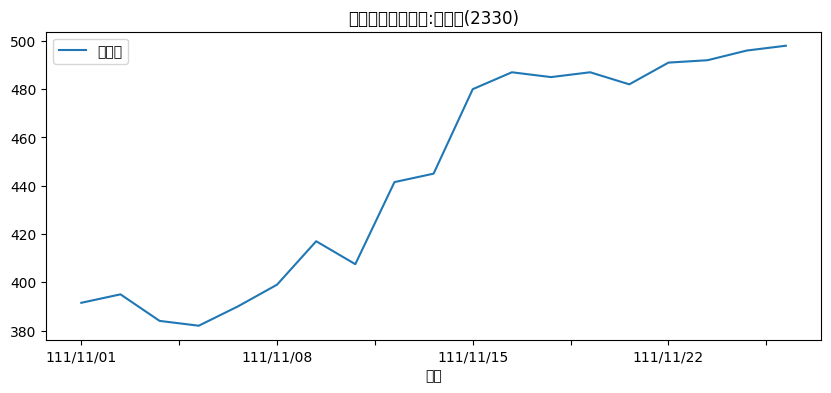

In [73]:
# 台股市場個股每日成交資訊 - 台積電(2330)
# 查詢頁面:https://www.twse.com.tw/zh/page/trading/exchange/STOCK_DAY.html
# 資料來源:https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20221126&stockNo=2330
import pandas as pd
url = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20221126&stockNo=2330'
df = pd.read_html(url, header=1)[0]    # 去除表頭
df

# 繪製值線圖
df[['日期', '收盤價']].plot(kind='line', x='日期', y='收盤價', title='股票每日成交資訊:台積電(2330)', figsize=(10,4))

#### 圖表無法顯示中文問題


<AxesSubplot:title={'center':'股票每日成交資訊:台積電(2330)'}, xlabel='日期'>

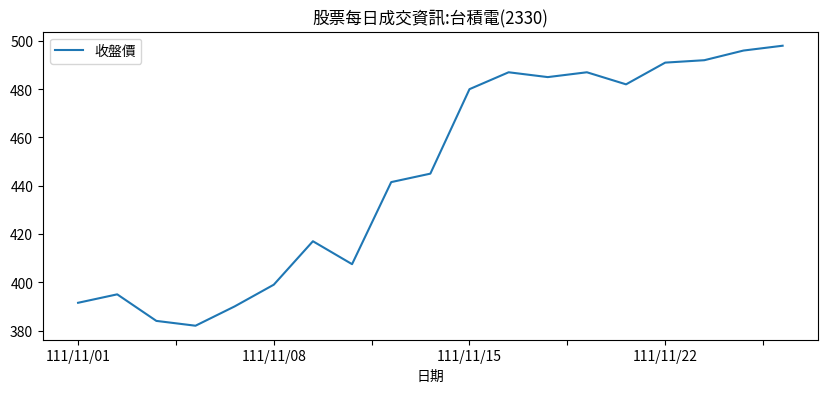

In [85]:
# 先下載台北黑體字型
# https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
# !wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib
import matplotlib.pyplot as plt
# 新增字體
matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
# 設定中文字型及負號正確顯示
plt.rcParams['font.sans-serif'] = 'Taipei Sans TC Beta'
plt.rcParams["axes.unicode_minus"] = False

# 繪製直線圖
import pandas as pd
url = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20221126&stockNo=2330'
df = pd.read_html(url, header=1)[0]    # 去除表頭
df

# 繪製值線圖
df[['日期', '收盤價']].plot(kind='line', x='日期', y='收盤價', title='股票每日成交資訊:台積電(2330)', figsize=(10,4))

<AxesSubplot:title={'center':'股票每日成交資訊：台積電(2330)'}, xlabel='日期'>

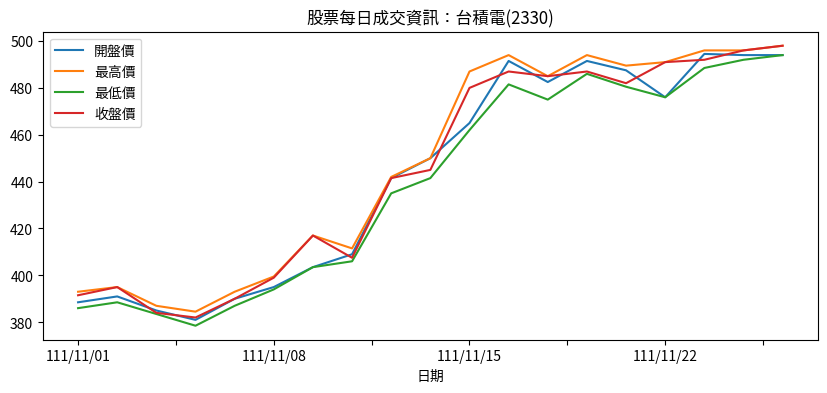

In [86]:
# 合併多張圖表
ax = plt.gca()  #   取得現在圖表區
df1 = df[['日期','開盤價','最高價','最低價','收盤價']]
df1.plot(kind='line', x='日期', y='開盤價', title='股票每日成交資訊：台積電(2330)', figsize=(10, 4), ax=ax)
df1.plot(kind='line', x='日期', y='最高價', title='股票每日成交資訊：台積電(2330)', figsize=(10, 4), ax=ax)
df1.plot(kind='line', x='日期', y='最低價', title='股票每日成交資訊：台積電(2330)', figsize=(10, 4), ax=ax)
df1.plot(kind='line', x='日期', y='收盤價', title='股票每日成交資訊：台積電(2330)', figsize=(10, 4), ax=ax)

In [88]:
# 合併多張圖表 - 較長時間
# ax = plt.gca()
# dfplot = dfall[['日期','開盤價','最高價','最低價','收盤價']]
# dfplot.plot(kind='line', x='日期', y='開盤價', ax=ax)
# dfplot.plot(kind='line', x='日期', y='最高價', ax=ax)
# dfplot.plot(kind='line', x='日期', y='最低價', ax=ax)
# dfplot.plot(kind='line', x='日期', y='收盤價', title='股票每日成交資訊：台積電(2330)', figsize=(10,4), grid=True, ax=ax)